# Name : Mahesh Manoj Malani 

# Date : 07/05/2023

Part 0 : Completed 

Part 1 : Completed

Part 2 : Completed

Part 3 : Completed

Part 4 : Completed

# **Part 0: Critical Thinking**

What do you think is the average revenue of your favourite youtuber? Explain how did you conclude this answer and what was your approach towards this question in brief

**Solution** :
 
*   My favourite youtuber is Carry Minati and it's average revenue is Rs 16 lakh.
*   I conclude this answer by giving it's name and it's revenue and my approach towards this question is firstly who is my favourite youtuber and why and then what other work he/she is doing apart from youtube and then finding their overall revenue.



What is the per/day consumption of bread (grams) in Ukraine in the past 100 days? Explain how did you conclude this answer and what was your approach towards this question in brief

**Solution** :

*   The per/day consumption of bread in ukrain is 356 grams in the past 100 days




#**Part 1: Descriptive Analysis**

In [31]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
from math import ceil
from sklearn.metrics import mean_squared_error
import math

In [32]:
# Reading the file using pandas library
df = pd.read_excel('/content/drive/MyDrive/Fittlyf Data Science internship/assignment.xlsx')

In [33]:
df.head()

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,3665558
1,2020,12,Clients,India,Lv2_Visitors,Actuals,2689569
2,2020,12,Clients,India,Lv3_Visitors,Actuals,1300571
3,2020,12,Clients,India,Lv4_Visitors,Actuals,717608
4,2020,12,Clients,India,Lv3_Visitors,Actuals,706677


In [34]:
# Total information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1572 non-null   int64 
 1   Month       1572 non-null   int64 
 2   Segment     1572 non-null   object
 3   Region      1572 non-null   object
 4   KPI         1572 non-null   object
 5   Value Type  1572 non-null   object
 6   Value       1572 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 86.1+ KB


What type of company this dataset belongs to? 


*   This dataset belongs to online selling type of company such as Flipkart, Amazon, Meesho, etc.
*   Here the Lv1_Visitors, Lv2_Visitors, Lv3_Visitors, Lv4_Visitors, Lv5_Visitors are according to the customers or clients buying the product in which order like Lv1_Visitors, Lv3_Visitors, Lv2_Visitors, Lv4_Visitors, Lv5_Visitors.



In [35]:
# Describing the dataset 
df.describe()

,Year,Month,Value
count,1572.000000,1572.000000,1.572000e+03
mean,2021.129771,6.500000,2.964329e+05
std,0.832781,3.453151,1.130364e+06
min,2020.000000,1.000000,1.370000e+02
25%,2020.000000,3.750000,9.247750e+03
50%,2021.000000,6.500000,3.257450e+04
75%,2022.000000,9.250000,1.796810e+05
max,2022.000000,12.000000,3.698690e+07


In [36]:
# Finding null values
df.isnull().sum()

Year          0
Month         0
Segment       0
Region        0
KPI           0
Value Type    0
Value         0
dtype: int64

In [37]:
# Shape of the dataset
df.shape

(1572, 7)

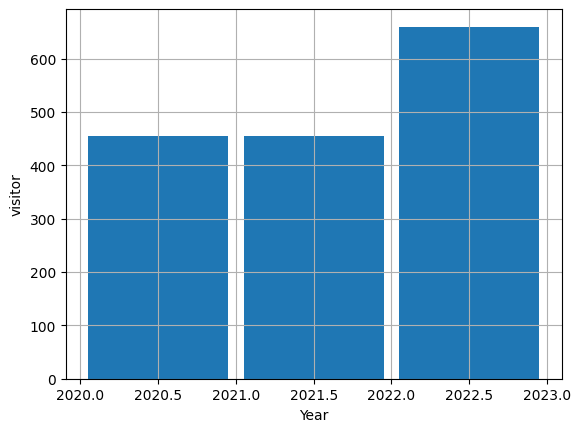

In [38]:
# What was the total number of visitors segmented by each level, every month in each year?
plt.hist(df['Year'],bins=[2020,2021,2022,2023],rwidth=0.9)
plt.xlabel('Year')
plt.ylabel('visitor')
plt.grid()

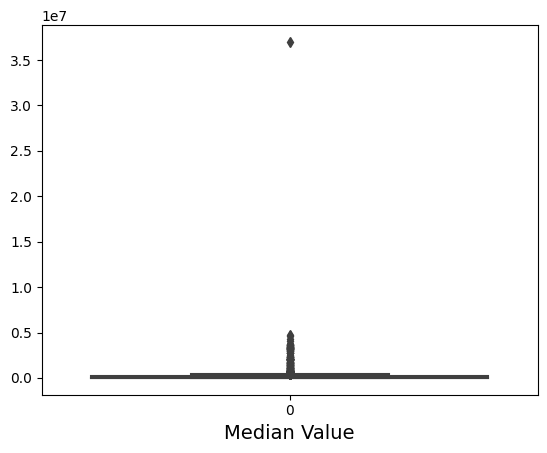

In [39]:
# Look out for outliers and if there is any, use your preferred way to handle them. Use visualization to showcase outliers before and after treating them.
sns.boxplot(df.Value)
plt.xlabel('Median Value', fontsize=14)
plt.show()

#Part 2: Prescriptive Analysis 

In [40]:
# Transpose the data into a view as the reference given, ( numbers presented here are not precise )
table = pd.pivot_table(df, values='Value', index=['Year','Segment','Region','Month','Value Type'],
                       columns=['KPI'])
table.sort_values(by=['Year','Month'])

KPI                                         Lv1_Visitors  Lv2_Visitors  \
Year Segment   Region     Month Value Type                               
2020 Clients   India      1     Actuals        3322789.0     2304318.0   
     Customers Aurangabad 1     Actuals           7540.0        4992.0   
               Dehradun   1     Actuals          28903.0       21332.0   
               Faridabad  1     Actuals          14750.0       12968.0   
               India      1     Actuals         424743.0      326618.0   
...                                                  ...           ...   
2022 Customers Dehradun   12    Actuals          28445.0       16806.0   
               Faridabad  12    Actuals          43786.0       31130.0   
               India      12    Actuals         409152.0      287220.0   
               Uddepy     12    Actuals          81802.0       49203.0   
               Ujjain     12    Actuals          18327.0       11600.0   

KPI                                         Lv3_Visitors  Lv4_Visitors  \
Year Segment   Region     Month Value Type                               
2020 Clients   India      1     Actuals        1205316.5      578593.0   
     Customers Aurangabad 1     Actuals           6850.0        2157.0   
               Dehradun   1     Actuals          25380.0        8578.0   
               Faridabad  1     Actuals          17720.0        8025.0   
               India      1     Actuals         371396.0      158246.0   
...                                                  ...           ...   
2022 Customers Dehradun   12    Actuals           8196.0        2561.0   
               Faridabad  12    Actuals          21086.0        4815.0   
               India      12    Actuals         205978.0       64707.0   
               Uddepy     12    Actuals          41606.0       16241.0   
               Ujjain     12    Actuals           6821.0        2556.0   

KPI                                         Lv5_Visitors  
Year Segment   Region     Month Value Type                
2020 Clients   India      1     Actuals         181969.5  
     Customers Aurangabad 1     Actuals            934.0  
               Dehradun   1     Actuals           3875.0  
               Faridabad  1     Actuals           2344.0  
               India      1     Actuals          42569.0  
...                                                  ...  
2022 Customers Dehradun   12    Actuals            357.0  
               Faridabad  12    Actuals            399.0  
               India      12    Actuals           4625.0  
               Uddepy     12    Actuals           1492.0  
               Ujjain     12    Actuals            293.0  

[300 rows x 5 columns]

In [41]:
# Count of per visitor
table.count()

KPI
Lv1_Visitors    300
Lv2_Visitors    300
Lv3_Visitors    300
Lv4_Visitors    300
Lv5_Visitors    300
dtype: int64

In [42]:
# Selecting only Lv5_Visitors value
df2=df[df["KPI"] == 'Lv5_Visitors'] 
print(df2)

      Year  Month    Segment      Region           KPI Value Type   Value
5     2020     12    Clients       India  Lv5_Visitors    Actuals  255723
7     2020     12    Clients       India  Lv5_Visitors    Actuals   74768
13    2021     12    Clients       India  Lv5_Visitors    Actuals  216178
15    2021     12    Clients       India  Lv5_Visitors    Actuals   69345
31    2022     12    Clients       India  Lv5_Visitors    Actuals   75211
...    ...    ...        ...         ...           ...        ...     ...
1561  2022      1  Customers      Uddepy  Lv5_Visitors    Actuals    7281
1567  2022      1  Customers    Dehradun  Lv5_Visitors    Actuals    1693
1569  2022      1  Customers      Ujjain  Lv5_Visitors    Actuals    1311
1570  2022      1  Customers   Faridabad  Lv5_Visitors    Actuals    1071
1571  2022      1  Customers  Aurangabad  Lv5_Visitors    Actuals     527

[324 rows x 7 columns]


In [43]:
# Grouping with Region
region=table.groupby('Region').mean()
region

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
Region,,,,,
Aurangabad,7.693583e+03,5.250944e+03,5818.000000,2112.527778,847.250000
Dehradun,8.942333e+04,5.535346e+04,43276.875000,18444.833333,8408.020833
Faridabad,2.972242e+04,2.322236e+04,23637.055556,9942.416667,3226.944444
India,1.992118e+06,1.341869e+06,820172.034722,619789.312500,114231.923611
Indore,1.235399e+05,7.274392e+04,55164.083333,30112.166667,13762.083333
Uddepy,2.479323e+05,1.546974e+05,140451.708333,56606.604167,21442.812500
Ujjain,6.537229e+04,4.038621e+04,35675.291667,15537.583333,6367.750000


In [44]:
# Finding mean of grouped data
new=region.mean(axis=1)
new

Region
Aurangabad      4344.461111
Dehradun       42981.304167
Faridabad      17950.238889
India         977635.904167
Indore         59064.433333
Uddepy        124226.166667
Ujjain         32667.825000
dtype: float64

In [45]:
# Assume you are a data analyst at Fittlyf company, analyze the data for the region performing worst in all the years and prescribe what could be the reason and how to improve the number of visitors from that region.
min_region=new.min()
print('Aurangabad', min_region)
# We can improve the number of visitors by providing the respective advertisements and offers that can be apply for products

Aurangabad 4344.461111111111


In [46]:
# Based on the given data, identify which region is having a better YearOnYear growth.
max_region=new.max()
print('India', max_region)

India 977635.9041666666


In [47]:
# Create a new feature (Level 5 visitors/Level 1 visitors) and what are the top 3 states based on that created feature for all the available segments and each given year. 
l1 = region.sort_values(by=['Lv1_Visitors'],ascending=False)

newdf = l1.drop(["Lv2_Visitors","Lv3_Visitors","Lv4_Visitors","Lv5_Visitors"], axis='columns')
newdf.head(3)

KPI,Lv1_Visitors
Region,
India,1.992118e+06
Uddepy,2.479323e+05
Indore,1.235399e+05


In [48]:
# Create any other metric apart from (Level5 visitors/Level1 visitors) and perform the same task as above. Compare if the states are same in both the questions, if they are different try to create a hypothesis about the reason behind it.
l2 = region.sort_values(by=['Lv2_Visitors'],ascending=False)

newdf = l2.drop(["Lv1_Visitors","Lv3_Visitors","Lv4_Visitors","Lv5_Visitors"], axis='columns')
newdf.head(3)
# The states are same in both the questions

KPI,Lv2_Visitors
Region,
India,1.341869e+06
Uddepy,1.546974e+05
Indore,7.274392e+04


#**Part 3: Prediction**

In [49]:
# Predict “Level 5” future values for the next 6 months
dfNew=df[df["KPI"] == 'Lv5_Visitors'] 
print(df2)

      Year  Month    Segment      Region           KPI Value Type   Value
5     2020     12    Clients       India  Lv5_Visitors    Actuals  255723
7     2020     12    Clients       India  Lv5_Visitors    Actuals   74768
13    2021     12    Clients       India  Lv5_Visitors    Actuals  216178
15    2021     12    Clients       India  Lv5_Visitors    Actuals   69345
31    2022     12    Clients       India  Lv5_Visitors    Actuals   75211
...    ...    ...        ...         ...           ...        ...     ...
1561  2022      1  Customers      Uddepy  Lv5_Visitors    Actuals    7281
1567  2022      1  Customers    Dehradun  Lv5_Visitors    Actuals    1693
1569  2022      1  Customers      Ujjain  Lv5_Visitors    Actuals    1311
1570  2022      1  Customers   Faridabad  Lv5_Visitors    Actuals    1071
1571  2022      1  Customers  Aurangabad  Lv5_Visitors    Actuals     527

[324 rows x 7 columns]


In [50]:
encoded_data = pd.get_dummies(dfNew, columns = ['Segment','Region'])

encoded_data

,Year,Month,KPI,Value Type,Value,Segment_Clients,Segment_Customers,Region_Aurangabad,Region_Dehradun,Region_Faridabad,Region_India,Region_Indore,Region_Uddepy,Region_Ujjain
5,2020,12,Lv5_Visitors,Actuals,255723,1,0,0,0,0,1,0,0,0
7,2020,12,Lv5_Visitors,Actuals,74768,1,0,0,0,0,1,0,0,0
13,2021,12,Lv5_Visitors,Actuals,216178,1,0,0,0,0,1,0,0,0
15,2021,12,Lv5_Visitors,Actuals,69345,1,0,0,0,0,1,0,0,0
31,2022,12,Lv5_Visitors,Actuals,75211,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,2022,1,Lv5_Visitors,Actuals,7281,0,1,0,0,0,0,0,1,0
1567,2022,1,Lv5_Visitors,Actuals,1693,0,1,0,1,0,0,0,0,0
1569,2022,1,Lv5_Visitors,Actuals,1311,0,1,0,0,0,0,0,0,1
1570,2022,1,Lv5_Visitors,Actuals,1071,0,1,0,0,1,0,0,0,0


In [51]:
x = encoded_data.iloc[:, [0,1,5,6,7,8,9,10,11,12,13]].values

y = encoded_data.iloc[:,[4]].values

In [52]:
x

array([[2020,   12,    1, ...,    0,    0,    0],
       [2020,   12,    1, ...,    0,    0,    0],
       [2021,   12,    1, ...,    0,    0,    0],
       ...,
       [2022,    1,    0, ...,    0,    0,    1],
       [2022,    1,    0, ...,    0,    0,    0],
       [2022,    1,    0, ...,    0,    0,    0]])

In [65]:
y

array([[255723],
       [ 74768],
       [216178],
       [ 69345],
       [ 75211],
       [ 14855],
       [  7880],
       [  5632],
       [  4335],
       [272017],
       [ 81680],
       [243224],
       [ 78573],
       [302037],
       [ 56624],
       [ 30544],
       [ 21321],
       [ 16528],
       [302759],
       [ 91531],
       [213163],
       [ 67336],
       [254773],
       [ 54849],
       [ 30911],
       [ 19919],
       [ 15486],
       [239246],
       [ 72639],
       [197400],
       [ 63347],
       [222620],
       [ 49816],
       [ 23781],
       [ 17034],
       [ 13384],
       [208570],
       [ 62262],
       [197779],
       [ 67570],
       [233506],
       [ 52588],
       [ 23736],
       [ 18685],
       [ 12512],
       [262065],
       [ 73677],
       [188447],
       [ 54953],
       [250201],
       [ 56878],
       [ 25389],
       [ 19955],
       [ 12854],
       [331538],
       [ 84189],
       [160160],
       [ 49641],
       [233305

In [54]:
# Splitting the model for Training and Testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=0)

In [55]:
# Now we will train the model using Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [56]:
# Prediction of values on the testing data
y_pred = classifier.predict(xtest)
y_pred

array([  7281, 253296,  30911,    964,   6062,   8263,  85929,  17271,
       253296,   1339,    873,   5069,  18368,    629,   1195, 253296,
        13384,    964,  85929,   4625,   4740, 253296,   1195,   1216,
       281102,   1195,   1195,    527,  21321,  14855,    964,  16903,
       302037,   1133, 302037,    964, 233305, 216178,   6062,   6062,
        85929,   6599,  19419,  25944,   6062,    293,   4625,   1195,
        13320,   1133,   7281,   7707,  56878,  61592,  13384,    357,
         1231, 233305,   1311,   4031,  13384, 255723, 249598,  13384,
         1195])

In [57]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [58]:
#Building the Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(xtrain , ytrain)
 
#Predictions on Testing data
LR_Test_predict = linear_model.predict(xtest) 
 
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(ytest,LR_Test_predict)
print("MAPE: ",LR_MAPE)

MAPE:  568.2166144776028


In [59]:
MSE = mean_squared_error(ytest, LR_Test_predict)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

56824.536447822786


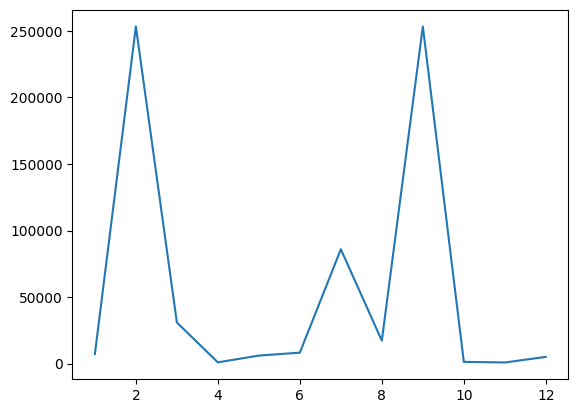

In [60]:
newY=pd.Series(['y'])
newYPred=pd.Series(['y_pred'])
z=pd.concat([newY,newYPred],axis=1)
val=encoded_data['Year']
a=[1,2,3,4,5,6,7,8,9,10,11,12]
b=y_pred[0:12]
plt.plot(a,b)
plt.show()

# **Part 4: A/B testing**

In [61]:
# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Fittlyf Data Science internship/AB_Test.xlsx')
df.head()

,Date,Address,Variations,DeviceType,Clicks,Visitors
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177


In [62]:
df['converted']=0.1

In [63]:
# Sample control and treatment group
control_sample = df[df['Variations'] == 'Control'].sample(n = 5000, random_state = 12)
treatment_sample = df[df['Variations'] == 'Treatment'].sample(n = 5000, random_state = 12)
ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

# Define functions for standard deviation and standard error
std_dev = lambda x : np.std(x, ddof = 0) 
std_error = lambda x : stats.sem(x, ddof = 0)
conversion_rate = ab_test.groupby('Variations')['converted'].agg([np.mean, std_dev, std_error])
conversion_rate.columns = ['conversion_rate', 'std_deviation', 'std_error']
conversion_rate

,conversion_rate,std_deviation,std_error
Variations,,,
Control,0.1,1.387779e-17,1.962616e-19
Treatment,0.1,1.387779e-17,1.962616e-19


In [64]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = ab_test[ab_test['Variations'] == 'Control']['converted']
treatment_results = ab_test[ab_test['Variations'] == 'Treatment']['converted']


num_control = control_results.count()
num_treatment = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [num_control, num_treatment]

z_stat, pval = proportions_ztest(successes, nobs = nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'Z Statistic - {z_stat:.2f}')
print(f'P-Value - {pval:.3f}')
print(f'CI 95% for control group - [{lower_con:.3f}, {upper_con:.3f}]')
print(f'CI 95% for treatment group - [{lower_treat:.3f}, {upper_treat:.3f}]')

Z Statistic - 0.00
P-Value - 1.000
CI 95% for control group - [0.092, 0.108]
CI 95% for treatment group - [0.092, 0.108]


As we can observe, the p-value for the A/B testing results we calculated is 1.000. If we assume the significance level may be at 0.05, then we can’t reject the NULL hypothesis at this p-value results. It means that observed results have occurred due to random chance and are not statistically significant to say that the landing page of the treatment group works better.